In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import seaborn as sns
from scipy.stats import bernoulli
import random

In [24]:
training_data = pd.DataFrame(data={"x":np.random.binomial(n = 1,p = 0.5,size=1000)})

In [25]:
training_data

,x
0,0
1,0
2,0
3,0
4,1
...,...
995,1
996,0
997,0
998,0


(array([487.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 513.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

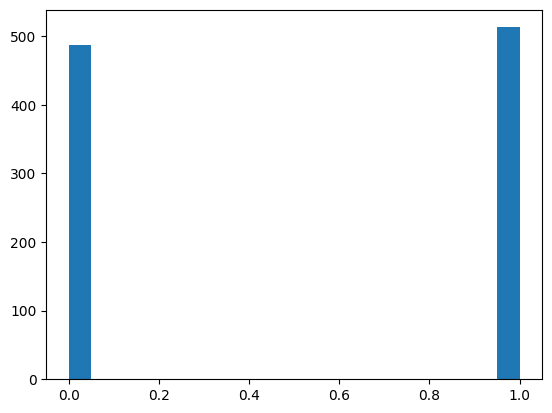

In [26]:
plt.hist(training_data, bins=20)

In [27]:
def bernaulli_nll(p):
    log_pdf = -np.mean(s.bernoulli.logpmf(training_data, p))
    return log_pdf                    

In [31]:
def del_by_del_bernaulli_nll(p_initial):
     del_by_del_p = np.mean((p_initial-training_data)/(p_initial*(1-p_initial)))
     return del_by_del_p

In [32]:
epsilon = 10**(-2)
epoch_counter = 0
p_initial = random.uniform (0.000000000000001,1)
tol = 10**(-6)

while True:
    initial_gradients = del_by_del_bernaulli_nll(p_initial)

    p_final = p_initial - (epsilon * initial_gradients)

    nll_initial_value = bernaulli_nll(p_initial)
    nll_final_value = bernaulli_nll(p_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1
    p_initial = p_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 1.0128881356507082
Epoch # 2, NLL Value = 0.9479409719742127
Epoch # 3, NLL Value = 0.9047278004731472
Epoch # 4, NLL Value = 0.8729976217076171
Epoch # 5, NLL Value = 0.8483879853586493
Epoch # 6, NLL Value = 0.8286168156835685
Epoch # 7, NLL Value = 0.8123366593746224
Epoch # 8, NLL Value = 0.7986847835161509
Epoch # 9, NLL Value = 0.7870755635328023
Epoch # 10, NLL Value = 0.7770934614007209
Epoch # 11, NLL Value = 0.7684331736824037
Epoch # 12, NLL Value = 0.7608639891296293
Epoch # 13, NLL Value = 0.754207473262702
Epoch # 14, NLL Value = 0.7483229128277273
Epoch # 15, NLL Value = 0.7430974917693792
Epoch # 16, NLL Value = 0.738439465753388
Epoch # 17, NLL Value = 0.734273300426118
Epoch # 18, NLL Value = 0.730536132630144
Epoch # 19, NLL Value = 0.7271751451359487
Epoch # 20, NLL Value = 0.7241455859981577
Epoch # 21, NLL Value = 0.7214092516277512
Epoch # 22, NLL Value = 0.7189333092246718
Epoch # 23, NLL Value = 0.7166893714316441
Epoch # 24, NLL Value = 

In [33]:
p_final

np.float64(0.5154195359700207)

In [9]:
print(f"Converged after {epoch_counter} epochs. Final NLL Value = {nll_initial_value}")

Converged after 14 epochs. Final NLL Value = 23.025850847200097


In [10]:
sns.distplot(a=training_data["x"],bins=10,fit=s.bernaulli,kde=False)

AttributeError: module 'scipy.stats' has no attribute 'bernaulli'

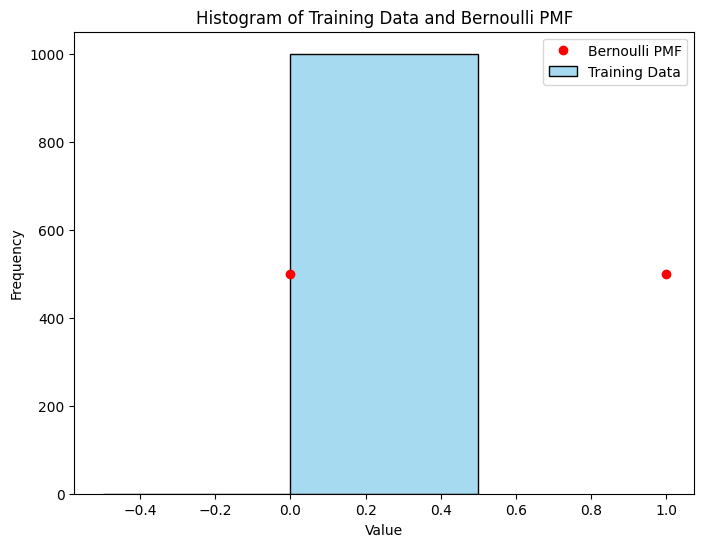

In [11]:
# Compute the PMF of Bernoulli distribution
p = 0.5  # Replace this with your estimated p value
x = np.arange(2)  # Bernoulli outcomes are 0 and 1
pmf = bernoulli.pmf(x, p)

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(training_data["x"], bins=2, kde=False, color='skyblue', label='Training Data')

# Overlay the Bernoulli PMF
plt.plot(x, pmf * len(training_data), 'o', color='red', label='Bernoulli PMF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Training Data and Bernoulli PMF')
plt.legend()
plt.show()